<a href="https://colab.research.google.com/github/AustinYanSebasmannAlderhaz/generative_ai/blob/main/41073125H_HW2_%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

作業說明：

打造自己的DNN(全連結)手寫辨識。

神經網路不能是三層(可以多，可以少，就是不能三層)

改成自己的樣子(不要一眼就看出來是老師的範例)

過多的說明都拿掉(陳述的內容要修改)

截圖上傳個人訓練過程中「驗証資料/verification data」正確率最高的參數與結果。

(可以多補充個人訓練過程中其它不好的結果與參數之間的觀察)

如果有使用 Gradio，一定要截圖Gradio的結果。

修改內容的過程是個人重新疏理，而繳交時個人測試的過程都可以全數保留，也就是說如果有實驗了幾個方式，不需要在繳交的時候只留最終結果。也許參數A用5結果普通，參數A改成10之後結果提升了多少等等，這些修改過程都可以保留在Colab當中。或者使用Markdown記下來。

保留過程讓你在回看的時知道自己有的嘗試，也讓助教知道你有走過這個過程。


繳交期限：3/10 23:59

繳交標題格式：學校 學號 系級 姓名 主題 (主題可打可不打)
(學校、系級打簡稱即可)

繳交內容必須包含：

colab連結(請記得將共用權限打開)
對此份作業的重點說明
此份作業的重點截圖


評分標準：

0分：程式連結無法順利開啟，且無截圖。

1分：程式開啟後只有匯入基本套件。

2分：程式連結無法順利開啟，但有部份截圖。

3分：GPT 水準或繳交作業與本周主題無關(若貼成別週作業也列在此。)

6分：作業繳交基本分，程式內容與課堂範例十分近似。例如僅更改其中一些數字。

8分：看的出來模型架構有大幅更改，但大致內容還是老師的範本。

10分：滿足上述作業說明。

註一：若沒有引入老師的固定4行套件，總分 -1。

註二：程式連結無法順利開啟包含 1.權限未開啟 2.繳交非colab連結的檔案 3.程式碼無法完整執行

註三：有請生成式AI幫忙的地方請特別說明，加上理解後的說明，並附上截圖(包括Prompt與生成結果)，不然都當抄襲AI。

註四：若認定抄襲，除該次作業0分外，總成績-10，再犯再扣，直至總成績扣完為止。

註五：若需要上傳的內容不多，請不要上傳PDF檔。

In [116]:
#隱藏層，有幾個神經元
#將神經元擴大到64個，並且增加一個隱藏層N4
#將神經元擴大到80個，並且增加一個隱藏層N5
N1 = 80
N2 = 80
N3 = 80
N4 = 80
N5 = 80

In [2]:
#安裝套件

!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [3]:
#打造神經網路需要的套件

%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio
import gradio as gr

Keras:一種容易使用的神經網路框架

In [4]:
#把資料讀進來(手寫辨識數據集)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [6]:
x_train.shape

(60000, 28, 28)

(六萬筆數據，每一筆數據的長相(28*28的矩陣))

我們想要看到的:(60000，784)

In [7]:
#其中一個測試集的內容
x_train[1145]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  68, 166, 229, 219, 196,  32,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28, 144, 242, 254, 254, 254, 254, 119,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 108,
        246, 254, 254, 254, 225, 231, 250,  56,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 186, 254,
        254, 254, 218, 100,  45, 207, 140,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  77, 163, 236, 254, 254,
        187,  97,   7,   0, 161, 242,  48,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  51, 253, 254, 246, 154,  39,
          3,   0,   0, 121, 246, 105,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55, 232, 119,  31,   0,   0,
          0,   0,  20, 209, 164,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   7,   0,   0,   0,   0,
         47, 153, 240, 240,  24,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        249, 254, 254, 254, 197,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 254,
        254, 183,  78, 209, 254, 134,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 201, 243,
        117,  10,   0,   7, 237, 197,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  40,
          0,   0,   0,   0, 201, 239,  23,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 138, 254,  86,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  76, 254, 121,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 141, 162, 110,   9,   0,   0,   0,
          0,   0,   0,   0,  64, 254, 157,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 190, 254, 242, 150,  40,   0,   0,   0,
          0,   0,   0,   0,  91, 254, 105,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 176, 254, 252, 147,  60,   9,   0,   0,
          0,   0,   0,  27, 173, 233,   9,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   9, 198, 255, 254, 255, 223, 148, 127,
         65,  65, 109, 213, 250, 127,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   7,  94, 200, 254, 254, 254, 254,
        254, 254, 254, 239,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,  60, 156, 202, 244,
        162, 150,  88,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

按下show data 後，數字0代表全黑，數字越大越白

In [8]:
#其中一個測試集的正確答案
y_train[1145]

3

### 輸入格式整理

用 `reshape` 將二維數據拉成一維，方便神經網路訓練

常模化:把所有數字拉到0到1之間

In [9]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [10]:
x_train.shape
#確認輸入輸出格式是否正確

(60000, 784)

### 輸出格式整理

使用One Hot Encoding
將純數子變成向量，例如3就變成[0 0 0 1 0 0 0 0 0 0]

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 打造第一個神經網路
## **======要重新訓練要從這開始======**

In [117]:
#建立一個空白模型
#要重新訓練要從這開始
model = Sequential()

我們每次用 `add` 去加一層, 從第一個隱藏層開始。而第一個隱藏層因為 TensorFlow 當然猜不到輸入有 784 個 features, 所以我們要告訴它。

In [118]:
from tensorflow.keras.layers import Dropout # 使用 Dropout 防止 Overfitting
model.add(Dense(N1, input_dim=784, activation='relu'))
#加入一個隱藏層(全連接型(幾個神經元，輸入維度，選擇激勵函數類型))
model.add(Dropout(0.2))  # 丟棄 20% 神經元


第二層開始就不用再說明輸入神經元個數 (因為就是前一層神經元數)。

In [119]:
model.add(Dense(N2, activation='relu'))
model.add(Dropout(0.2))

In [120]:
model.add(Dense(N3, activation='relu'))
model.add(Dropout(0.2))

In [121]:
model.add(Dense(N4, activation='relu'))
model.add(Dropout(0.2))

In [122]:
model.add(Dense(N5, activation='relu'))
model.add(Dropout(0.2))

(之後你想加層數，直接複製貼上)

(要減層數，直接刪掉程式碼)

In [123]:
model.add(Dense(10, activation='softmax'))
#最後一層(全連接型(十個輸出，總和為1))

至此我們的第一個神經網路就建好了!

### 組裝

* 決定使用的 loss function, 一般是 `mse`(均方差)
* 決定 optimizer, 我們用標準的 SGD(隨機梯度下降法)
* 設 learning rate

為了一邊訓練一邊看到結果(隨時告訴我們正確率), 我們加設

    metrics=['accuracy']
    


### Q：以下為神經網路的Colab程式碼，此神經網路訓練的結果為loss: 0.015807824209332466 正確率 0.8980000019073486 ，請幫我想想看要如何有更低的loss和更高的正確率?

ChatGPT的回應: 你目前的 MNIST 神經網路達到了 loss: 0.0158 和 準確率: 89.8%，但還有許多優化空間！以下是幾種可以降低 loss 並提高準確率的方法：

1️⃣ 增加模型複雜度
 * 增加神經元數量
 * 增加層數

2️⃣ 改進損失函數

 * 你目前使用的是 MSE（均方誤差），但對於分類問題，應該使用 categorical_crossentropy，
這會讓模型更容易學習

3️⃣ 更好的優化器

* 你目前使用的是 SGD（隨機梯度下降），但對於深度學習來說，Adam 會更快收斂

4️⃣ 增加訓練次數（Epochs）

5️⃣ 使用 Dropout 防止 Overfitting
* 你的模型沒有 Dropout，可能會過擬合。加入 Dropout 可以防止過度依賴訓練數據

6️⃣ 使用 Batch Normalization

* Batch Normalization 可以加速訓練並提高準確率

In [124]:
#model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])
#模型編譯(選擇損失函數，optimizer,)
#這種分類問題，要用哪個loss function?
#有沒有其他訓練方式? 自己調整學習率?

from tensorflow.keras.optimizers import Adam #將優化器改成Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) # 損失函數改為categorical_crossentropy


## 檢視神經網路

### 4.1 看 model 的 summary

In [125]:
model.summary()
#前面的為自訂隱藏層
#最後一層為輸出層

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 80)                  │          62,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 80)                  │           6,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 80)                  │           6,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 80)                  │           6,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 80)                  │           6,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,530 (349.73 KB)

 Trainable params: 89,530 (349.73 KB)

 Non-trainable params: 0 (0.00 B)

## 訓練神經網路

* 一次要訓練幾筆資料 (`batch_size`), 我們就 100 筆調一次參數好了      (一本書一次要看幾頁?)
* 這 6 萬筆資料一共要訓練幾次 (`epochs`)      (一本書總共要看幾次?)

In [126]:
model.fit(x_train, y_train, batch_size=100, epochs=50)#將epochs增加到30 #將epochs增加到50
#模型開始學習(輸入資料，正確的輸出，批次大小，時代)

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6473 - loss: 1.0383
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9254 - loss: 0.2738
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9417 - loss: 0.2105
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9498 - loss: 0.1848
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9542 - loss: 0.1681
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9589 - loss: 0.1481
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9658 - loss: 0.1280
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9687 - loss: 0.1187
Epoch 9/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9668 - loss: 0.1209
Epoch 10/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9685 - loss: 0.1095
Epoch 11/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9711 - loss: 0.1037
Epoch 12/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [127]:
loss, acc = model.evaluate(x_test, y_test)
#測試資料的正確率

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.1153


In [128]:
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 97.88%


### 目標正確率：9成

###實際使用並預測模型

In [129]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [130]:
predict

array([7, 2, 1, ..., 4, 5, 6])

不要忘了我們的 `x_test` 每筆資料已經換成 784 維的向量, 我們要整型回 28x28 的矩陣才能當成圖形顯示出來!

In [131]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [132]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總成績」。

In [133]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.1153


In [136]:
print('loss:', score[0])
print('正確率', score[1])
#我們希望測試的時候loss會越來越小，正確率越高越好

loss: 0.09814900159835815
正確率 0.9787999987602234


### 紀錄:


|  隱藏層數   | 神經元個數  |epoch|優化器|損失函數|是否使用Dropout |正確率|loss值|
|  ----     | ----     |----|----|----|----|----|----|
| 3        | 20    |10 |SGD|relu|否|0.898|0.016|
| 4        | 64    |30 |SGD|relu|否|0.9517|0.0074|
| 4        | 64    |30 |Adam| categorical_crossentropy |否|0.9751|0.1398|
| 4        | 64    |30 |Adam| categorical_crossentropy |是|0.9759|0.0882|
| 4        | 64    |50 |Adam| categorical_crossentropy |是|0.9779|0.0937|
| 5        | 80    |50 |SGD|relu|否|0.9653|0.0052|
| 5        | 80    |50 |Adam| categorical_crossentropy|是|0.9787|0.0981|
| 4        | 80    |40 |Adam| categorical_crossentropy |否|0.9759|0.1443|


## 最佳設定：
* 4個隱藏層
* 64個神經元
* 50個epoch
* Adam 優化器
* categorical_crossentropy
* 使用 Dropout


### 結論：
1. Adam + categorical_crossentropy 在準確率上優於 SGD + MSE
2. Dropout 有助於降低 Loss，並略微提升準確率
3. 增加 Epochs 可以提升準確率，但效果逐漸遞減(會導致過擬合)
4. 增加神經元數量與隱藏層數對準確率影響有限

### 用 Gradio 來展示(圖形介面程式)

In [137]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [138]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

### 注意：以下程式執行時，網址才可用

In [139]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6a161bd4345b0131fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6a161bd4345b0131fe.gradio.live


### 手寫辨識截圖

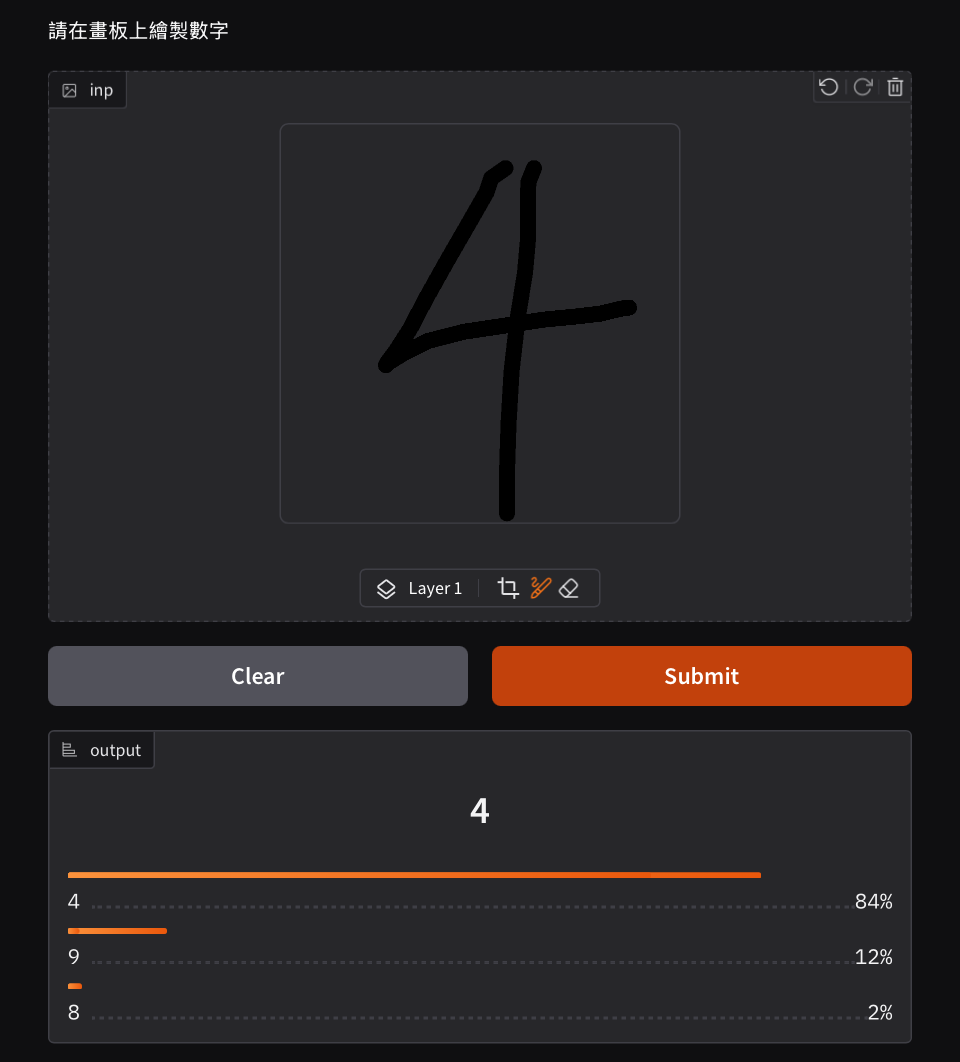

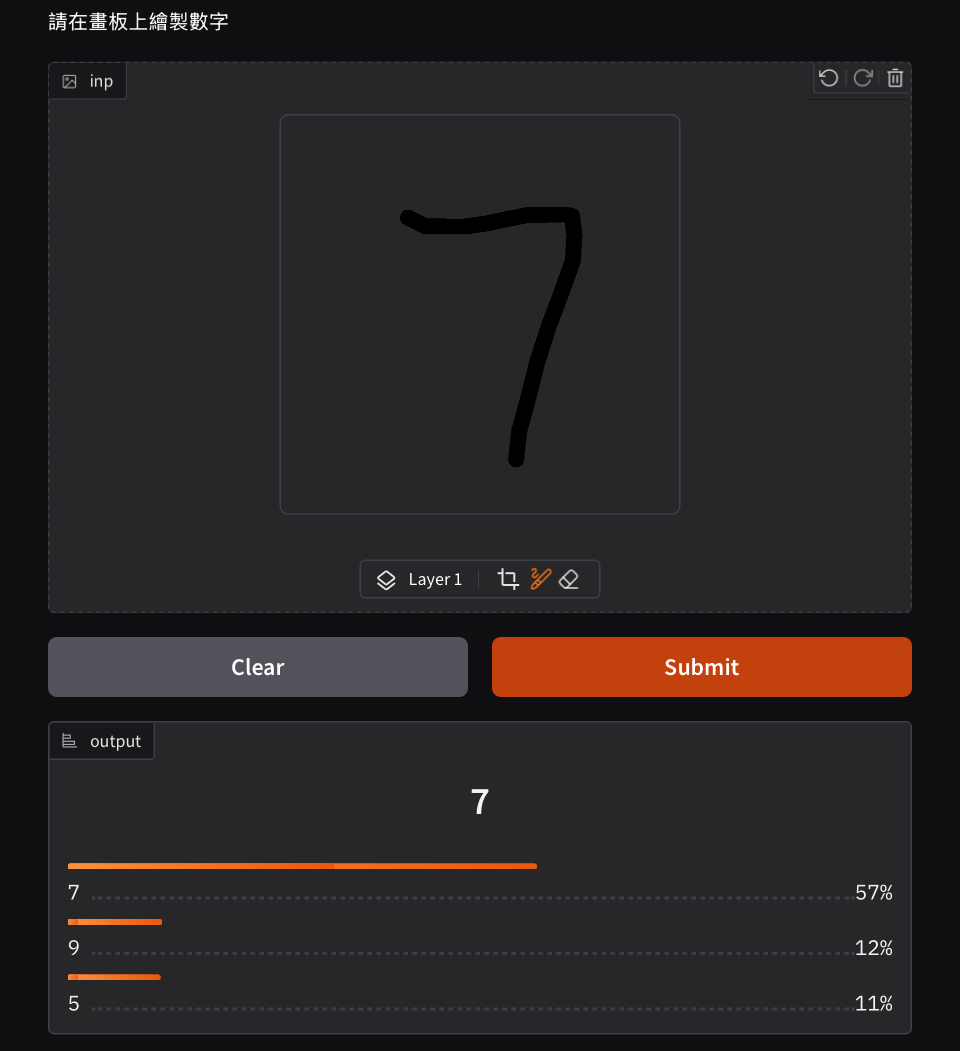

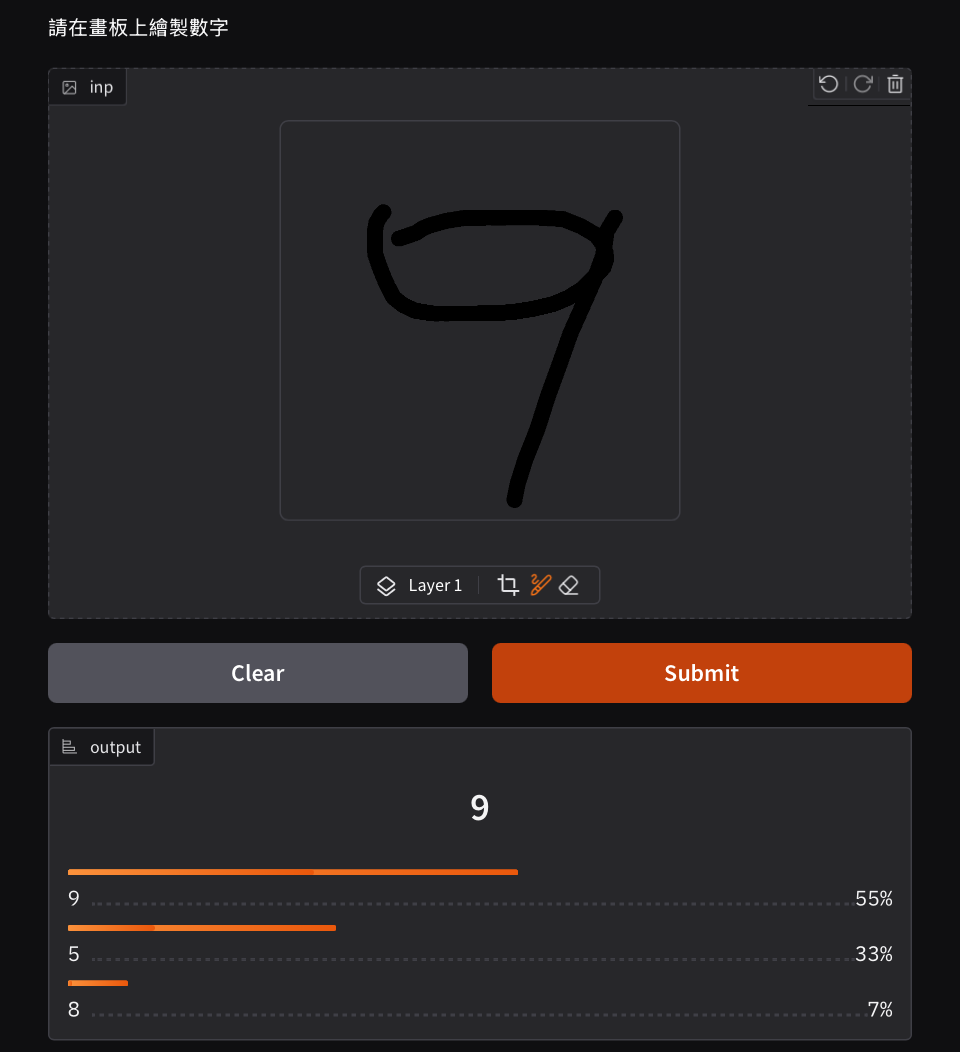

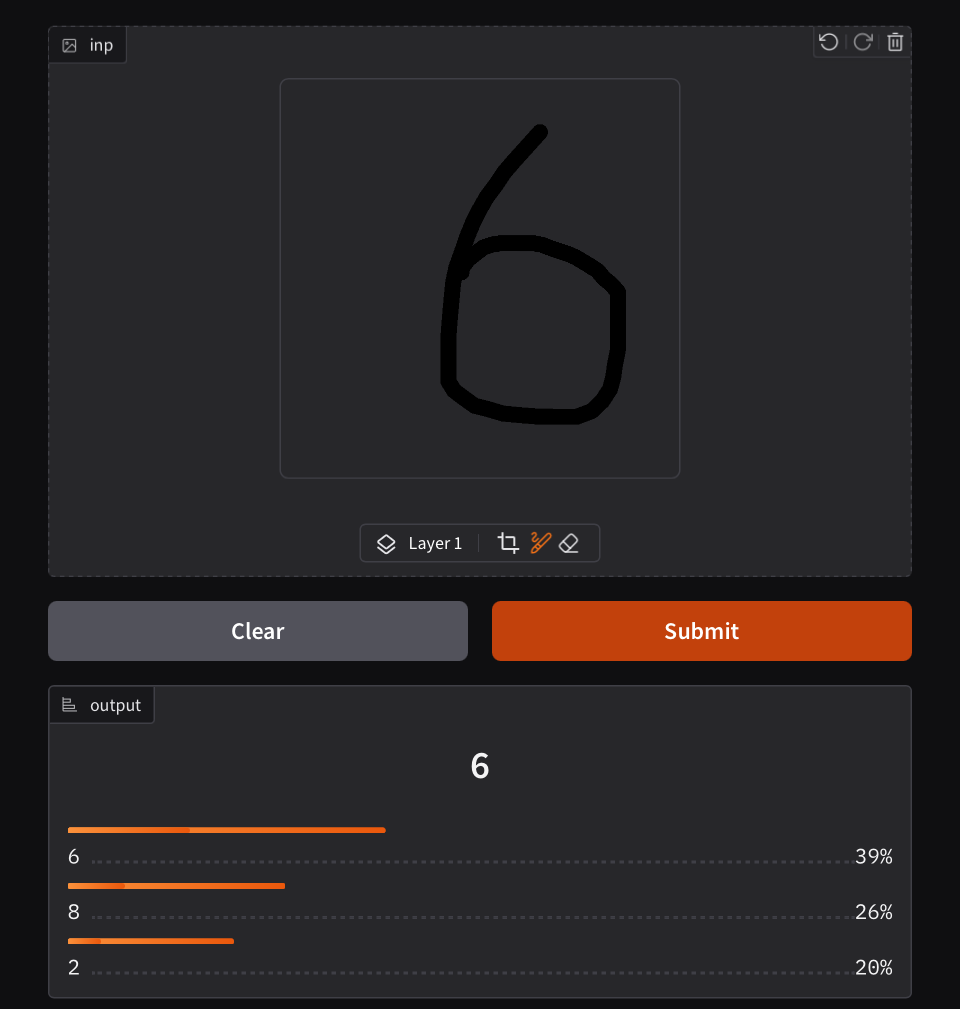

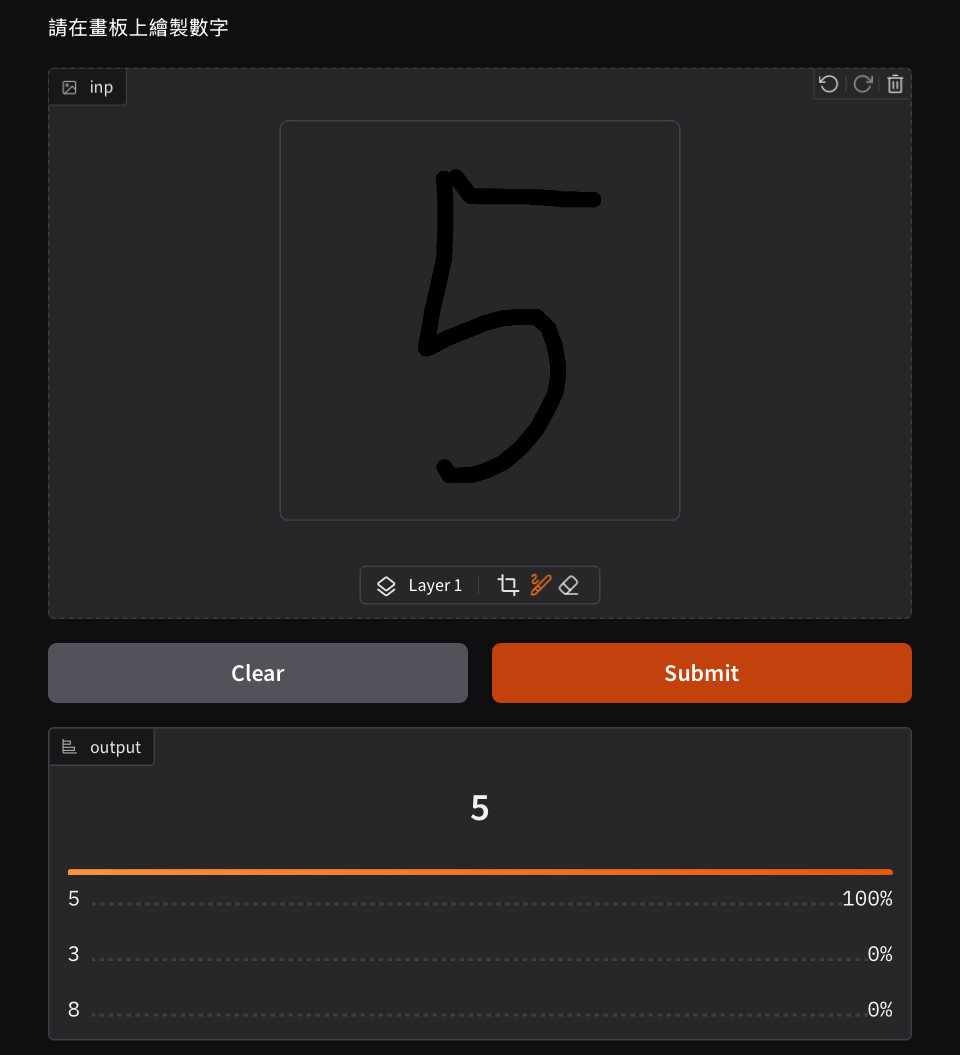